In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
df= pd.read_csv("C://Users//Lenovo//Downloads//mlds (1).csv")

In [3]:
df

,Unnamed: 0,fipsStateCode,fipsCountyCode,State Name,County Name,Year,incidentType,Business_category,Firms,Establishments,Hour,Risk_PN,Risk_NF,Risk_PF,Risk_NP,Risk_FN,Risk_FP
0,0,8,13,Colorado,Boulder,2021,Fire,Airports & Air Transport,22,22,0,0.344000,0.245623,0.832339,0.804678,0.182578,0.591628
1,1,8,13,Colorado,Boulder,2021,Fire,Airports & Air Transport,22,22,12,0.426318,0.245623,0.798812,0.561823,0.328392,0.591628
2,2,8,13,Colorado,Boulder,2021,Fire,Airports & Air Transport,22,22,24,0.496853,0.245623,0.757769,0.561823,0.445531,0.591628
3,3,8,13,Colorado,Boulder,2021,Fire,Airports & Air Transport,22,22,36,0.557518,0.245623,0.707290,0.561823,0.540159,0.591628
4,4,8,13,Colorado,Boulder,2021,Fire,Airports & Air Transport,22,22,48,0.609881,0.245623,0.644901,0.561823,0.617009,0.591628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191787,191787,45,77,South Carolina,Pickens,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,60,0.151276,0.355313,0.117263,0.112123,0.158769,0.119407
191788,191788,45,77,South Carolina,Pickens,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,72,0.168229,0.329571,0.089463,0.112123,0.182358,0.119407
191789,191789,45,77,South Carolina,Pickens,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,84,0.184787,0.302698,0.060678,0.112123,0.205203,0.119407
191790,191790,45,77,South Carolina,Pickens,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,96,0.200960,0.274639,0.030871,0.112123,0.227329,0.119407


In [4]:
len(df['fipsStateCode'].unique())

51

In [5]:
df['fipsCountyCode'].nunique()

291

In [6]:
291*51

14841

In [7]:
df['FIPS'] = df['fipsStateCode'].astype(str).str.zfill(2) + df['fipsCountyCode'].astype(str).str.zfill(3)



In [8]:
df['FIPS'].nunique()

2518

In [9]:
df['State Name'].nunique()

95

In [10]:
df['County Name'].nunique()

2293

In [11]:
fips_df= pd.read_csv("C://Users//Lenovo//Downloads//state_and_county_fips_master.csv")

In [12]:
fips_df

,fips,name,state
0,0,UNITED STATES,NaN
1,1000,ALABAMA,NaN
2,1001,Autauga County,AL
3,1003,Baldwin County,AL
4,1005,Barbour County,AL
...,...,...,...
3190,56037,Sweetwater County,WY
3191,56039,Teton County,WY
3192,56041,Uinta County,WY
3193,56043,Washakie County,WY


In [13]:
fips_df['fips'] = fips_df['fips'].astype(str)
fips_df['fips'] = fips_df['fips'].astype(str).apply(lambda x: x.zfill(5) if len(x) < 5 else x)

# Convert 'FIPS' in the left table to string and ensure it has 5 digits
df['FIPS'] = df['FIPS'].astype(str).apply(lambda x: x.zfill(5) if len(x) < 5 else x)

In [14]:
# Left join using fipsStateCode and fipsCountyCode
df = pd.merge(df, fips_df, left_on='FIPS', right_on='fips', how='left')


In [15]:
df

,Unnamed: 0,fipsStateCode,fipsCountyCode,State Name,County Name,Year,incidentType,Business_category,Firms,Establishments,...,Risk_PN,Risk_NF,Risk_PF,Risk_NP,Risk_FN,Risk_FP,FIPS,fips,name,state
0,0,8,13,Colorado,Boulder,2021,Fire,Airports & Air Transport,22,22,...,0.344000,0.245623,0.832339,0.804678,0.182578,0.591628,08013,08013,Boulder County,CO
1,1,8,13,Colorado,Boulder,2021,Fire,Airports & Air Transport,22,22,...,0.426318,0.245623,0.798812,0.561823,0.328392,0.591628,08013,08013,Boulder County,CO
2,2,8,13,Colorado,Boulder,2021,Fire,Airports & Air Transport,22,22,...,0.496853,0.245623,0.757769,0.561823,0.445531,0.591628,08013,08013,Boulder County,CO
3,3,8,13,Colorado,Boulder,2021,Fire,Airports & Air Transport,22,22,...,0.557518,0.245623,0.707290,0.561823,0.540159,0.591628,08013,08013,Boulder County,CO
4,4,8,13,Colorado,Boulder,2021,Fire,Airports & Air Transport,22,22,...,0.609881,0.245623,0.644901,0.561823,0.617009,0.591628,08013,08013,Boulder County,CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191787,191787,45,77,South Carolina,Pickens,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,...,0.151276,0.355313,0.117263,0.112123,0.158769,0.119407,45077,45077,Pickens County,SC
191788,191788,45,77,South Carolina,Pickens,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,...,0.168229,0.329571,0.089463,0.112123,0.182358,0.119407,45077,45077,Pickens County,SC
191789,191789,45,77,South Carolina,Pickens,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,...,0.184787,0.302698,0.060678,0.112123,0.205203,0.119407,45077,45077,Pickens County,SC
191790,191790,45,77,South Carolina,Pickens,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,...,0.200960,0.274639,0.030871,0.112123,0.227329,0.119407,45077,45077,Pickens County,SC


In [16]:
df.groupby(['state','name']).count()

Unnamed: 0  fipsStateCode  fipsCountyCode  \
state name                                                                      
AK    Aleutians West Census Area            14             14              14   
      Anchorage Municipality                 6              6               6   
      Bethel Census Area                    60             60              60   
      Fairbanks North Star Borough          60             60              60   
      Haines Borough                        10             10              10   
...                                        ...            ...             ...   
WY    Platte County                         10             10              10   
      Sublette County                       20             20              20   
      Teton County                           9              9               9   
      Uinta County                          20             20              20   
      Washakie County                       10             10              10   

                                    State Name  County Name  Year  \
state name                                                          
AK    Aleutians West Census Area            14           14    14   
      Anchorage Municipality                 6            6     6   
      Bethel Census Area                    60           60    60   
      Fairbanks North Star Borough          60           60    60   
      Haines Borough                        10           10    10   
...                                        ...          ...   ...   
WY    Platte County                         10           10    10   
      Sublette County                       20           20    20   
      Teton County                           9            9     9   
      Uinta County                          20           20    20   
      Washakie County                       10           10    10   

                                    incidentType  Business_category  Firms  \
state name                                                                   
AK    Aleutians West Census Area              14                 14     14   
      Anchorage Municipality                   6                  6      6   
      Bethel Census Area                      60                 60     60   
      Fairbanks North Star Borough            60                 60     60   
      Haines Borough                          10                 10     10   
...                                          ...                ...    ...   
WY    Platte County                           10                 10     10   
      Sublette County                         20                 20     20   
      Teton County                             9                  9      9   
      Uinta County                            20                 20     20   
      Washakie County                         10                 10     10   

                                    Establishments  Hour  Risk_PN  Risk_NF  \
state name                                                                   
AK    Aleutians West Census Area                14    14       14       14   
      Anchorage Municipality                     6     6        6        6   
      Bethel Census Area                        60    60       60       60   
      Fairbanks North Star Borough              60    60       60       60   
      Haines Borough                            10    10       10       10   
...                                            ...   ...      ...      ...   
WY    Platte County                             10    10       10       10   
      Sublette County                           20    20       20       20   
      Teton County                               9     9        9        9   
      Uinta County                              20    20       20       20   
      Washakie County                           10    10       10       10   

                                    Risk_PF  Risk_NP  

In [17]:
are_equal = df['FIPS'] == df['fips']

# To see the result, this will show a boolean series
print(are_equal)

0         True
1         True
2         True
3         True
4         True
          ... 
191787    True
191788    True
191789    True
191790    True
191791    True
Length: 191792, dtype: bool


In [18]:
df.drop(['State Name', 'County Name', 'fipsStateCode','fipsCountyCode', 'fips'], axis=1, inplace=True)


In [19]:
df

,Unnamed: 0,Year,incidentType,Business_category,Firms,Establishments,Hour,Risk_PN,Risk_NF,Risk_PF,Risk_NP,Risk_FN,Risk_FP,FIPS,name,state
0,0,2021,Fire,Airports & Air Transport,22,22,0,0.344000,0.245623,0.832339,0.804678,0.182578,0.591628,08013,Boulder County,CO
1,1,2021,Fire,Airports & Air Transport,22,22,12,0.426318,0.245623,0.798812,0.561823,0.328392,0.591628,08013,Boulder County,CO
2,2,2021,Fire,Airports & Air Transport,22,22,24,0.496853,0.245623,0.757769,0.561823,0.445531,0.591628,08013,Boulder County,CO
3,3,2021,Fire,Airports & Air Transport,22,22,36,0.557518,0.245623,0.707290,0.561823,0.540159,0.591628,08013,Boulder County,CO
4,4,2021,Fire,Airports & Air Transport,22,22,48,0.609881,0.245623,0.644901,0.561823,0.617009,0.591628,08013,Boulder County,CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191787,191787,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,60,0.151276,0.355313,0.117263,0.112123,0.158769,0.119407,45077,Pickens County,SC
191788,191788,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,72,0.168229,0.329571,0.089463,0.112123,0.182358,0.119407,45077,Pickens County,SC
191789,191789,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,84,0.184787,0.302698,0.060678,0.112123,0.205203,0.119407,45077,Pickens County,SC
191790,191790,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,96,0.200960,0.274639,0.030871,0.112123,0.227329,0.119407,45077,Pickens County,SC


In [20]:
df['state']

0         CO
1         CO
2         CO
3         CO
4         CO
          ..
191787    SC
191788    SC
191789    SC
191790    SC
191791    SC
Name: state, Length: 191792, dtype: object

In [21]:
import pandas as pd


# Dictionary to map state abbreviations to full names
state_abbrev_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}

# Replace abbreviations with full names
df['state'] = df['state'].map(state_abbrev_to_name)

print(df)


        Unnamed: 0  Year incidentType  \
0                0  2021         Fire   
1                1  2021         Fire   
2                2  2021         Fire   
3                3  2021         Fire   
4                4  2021         Fire   
...            ...   ...          ...   
191787      191787  2016         Fire   
191788      191788  2016         Fire   
191789      191789  2016         Fire   
191790      191790  2016         Fire   
191791      191791  2016         Fire   

                                        Business_category  Firms  \
0                                Airports & Air Transport     22   
1                                Airports & Air Transport     22   
2                                Airports & Air Transport     22   
3                                Airports & Air Transport     22   
4                                Airports & Air Transport     22   
...                                                   ...    ...   
191787  Power Plants (Electrici

In [24]:
state_county_final_dict = (
    df.drop_duplicates(subset=['state', 'name'])
      .groupby('state')['name']
      .apply(list)
      .to_dict()
)

# Save to JSON
with open('state_county_final_dict.json', 'w') as f:
    json.dump(state_county_final_dict, f, indent=2)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Input features (same for all models)
input_columns = ['name', 'state', 'Hour', 'Business_category', 'incidentType']

# Output columns (different for each model)
output_columns = ['Risk_PN', 'Risk_NP', 'Risk_PF', 'Risk_FP', 'Risk_FN', 'Risk_NF']

# Define categorical and numeric columns
categorical_cols = ['name', 'state', 'Business_category', 'incidentType']
numeric_cols = ['Hour']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ])

# Create dictionaries for models and predictions
models = {}
predictions = {}

# Train a separate model for each risk column
for risk_col in output_columns:
    # Prepare the data
    X = df[input_columns]
    y = df[risk_col]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Pipeline: preprocessing + model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=25, random_state=42,n_jobs=-1))
    ])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Save the trained model
    models[risk_col] = pipeline

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    predictions[risk_col] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    r2_rf= r2_score(y_test,y_pred)
    print(f"Mean Squared Error for {risk_col}: {mse}")

# Example predictions access
predictions_PN = predictions['Risk_PN']
predictions_NP = predictions['Risk_NP']
predictions_PF = predictions['Risk_PF']
predictions_FP = predictions['Risk_FP']
predictions_FN = predictions['Risk_FN']
predictions_NF = predictions['Risk_NF']


Mean Squared Error for Risk_PN: 0.035803730814987667
Mean Squared Error for Risk_NP: 0.031081879945335466
Mean Squared Error for Risk_PF: 0.0356211064358925
Mean Squared Error for Risk_FP: 0.030471626513775035
Mean Squared Error for Risk_FN: 0.03528142953451602
Mean Squared Error for Risk_NF: 0.030200430323222702


In [26]:
import pickle

# Save each model in the models dictionary as a separate pickle file
for risk_col, pipeline in models.items():
    with open(f'{risk_col}_model.pkl', 'wb') as file:
        pickle.dump(pipeline, file)
    print(f"Saved model for {risk_col} as {risk_col}_model.pkl")


Saved model for Risk_PN as Risk_PN_model.pkl
Saved model for Risk_NP as Risk_NP_model.pkl
Saved model for Risk_PF as Risk_PF_model.pkl
Saved model for Risk_FP as Risk_FP_model.pkl
Saved model for Risk_FN as Risk_FN_model.pkl
Saved model for Risk_NF as Risk_NF_model.pkl


In [27]:
df['Business_category'].unique()

array(['Airports & Air Transport', 'Hospitals & Healthcare Facilities',
       'Power Plants (Electricity Generation & Distribution)',
       'Water Treatment & Utilities'], dtype=object)

In [28]:
df['incidentType'].unique()

array(['Fire', 'Tornado', 'Severe Storm', 'Hurricane', 'Flood',
       'Severe Ice Storm', 'Snowstorm', 'Mud/Landslide', 'Earthquake',
       'Coastal Storm'], dtype=object)

In [29]:
# XG Boost

In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Input features (same for all models)
input_columns = ['name', 'state', 'Hour', 'Business_category', 'incidentType']

# Output columns (different for each model)
output_columns = ['Risk_PN', 'Risk_NP', 'Risk_PF', 'Risk_FP', 'Risk_FN', 'Risk_NF']

# Define categorical and numeric columns
categorical_cols = ['name', 'state', 'Business_category', 'incidentType']
numeric_cols = ['Hour']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ])

# Create dictionaries for models and predictions
models = {}
predictions = {}

# Train a separate model for each risk column
for risk_col in output_columns:
    # Prepare the data
    X = df[input_columns]
    y = df[risk_col]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Pipeline: preprocessing + model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1))
    ])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Save the trained model
    models[risk_col] = pipeline

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    predictions[risk_col] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    r2_xbg= r2_score(y_test,y_pred)
    print(f"Mean Squared Error for {risk_col}: {mse}")

# Optional: Access individual predictions
predictions_PN = predictions['Risk_PN']
predictions_NP = predictions['Risk_NP']
predictions_PF = predictions['Risk_PF']
predictions_FP = predictions['Risk_FP']
predictions_FN = predictions['Risk_FN']
predictions_NF = predictions['Risk_NF']


Mean Squared Error for Risk_PN: 0.030744836830296718
Mean Squared Error for Risk_NP: 0.03171391304572235
Mean Squared Error for Risk_PF: 0.03065837819189914
Mean Squared Error for Risk_FP: 0.032730751478766314
Mean Squared Error for Risk_FN: 0.030058114077117226
Mean Squared Error for Risk_NF: 0.028561700852057538


In [39]:
r2_xbg

0.7239662854803762

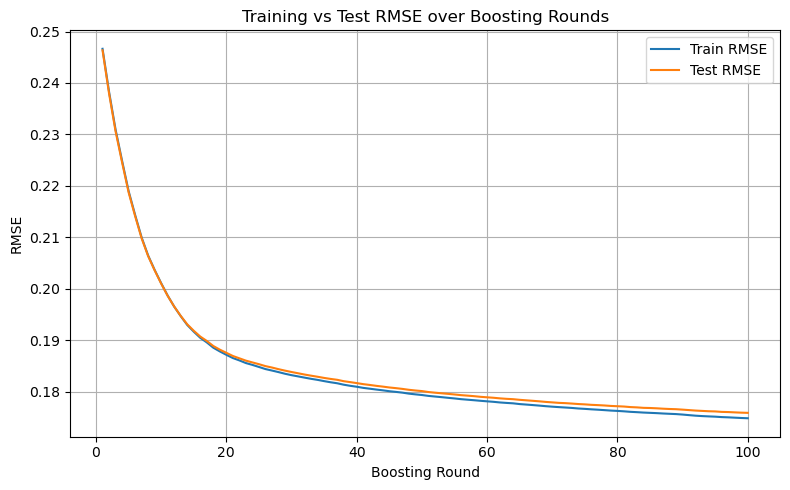

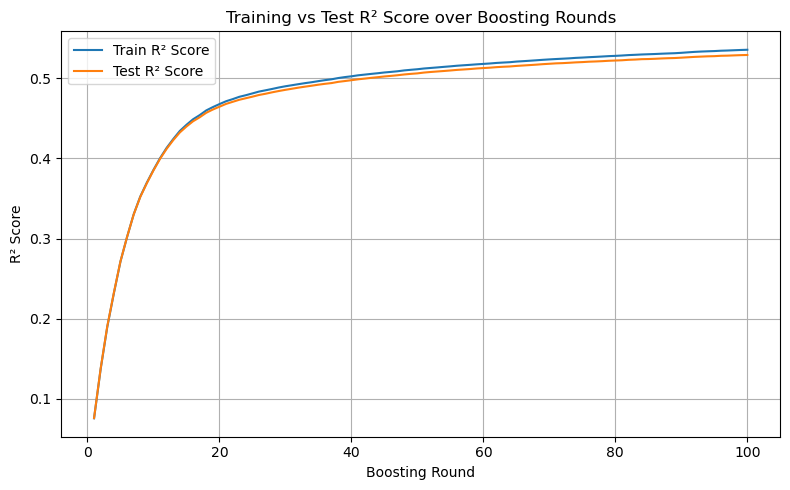

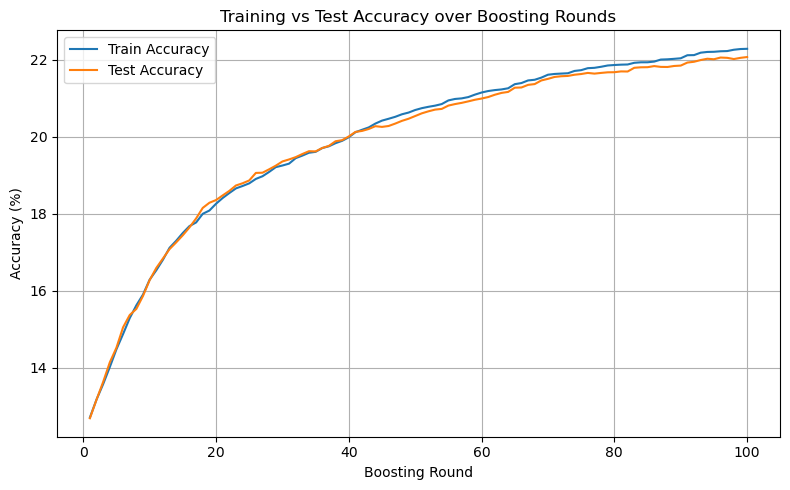

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Number of boosting rounds
n_estimators = 100

# Store RMSEs, R² scores, and accuracy for one of the models (e.g., Risk_PN)
train_errors = []
test_errors = []
train_r2_scores = []
test_r2_scores = []
train_accuracies = []
test_accuracies = []

# Re-prepare the data
X = df[input_columns]
y = df['Risk_PN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess manually
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Train model stage by stage
model = XGBRegressor(n_estimators=n_estimators, learning_rate=0.1, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

for i in range(1, n_estimators + 1):
    y_train_pred = model.predict(X_train_transformed, iteration_range=(0, i))
    y_test_pred = model.predict(X_test_transformed, iteration_range=(0, i))
    
    # Compute RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Compute R² Score
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Compute accuracy (percentage of correct predictions)
    # Since it's a regression task, "accuracy" is a bit tricky. We use a simple threshold for small error.
    accuracy_threshold = 0.05  # You can adjust this threshold
    train_accuracy = np.mean(np.abs(y_train - y_train_pred) <= accuracy_threshold) * 100
    test_accuracy = np.mean(np.abs(y_test - y_test_pred) <= accuracy_threshold) * 100

    # Store the results
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting RMSE
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_estimators + 1), train_errors, label='Train RMSE')
plt.plot(range(1, n_estimators + 1), test_errors, label='Test RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('Training vs Test RMSE over Boosting Rounds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting R² Score
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_estimators + 1), train_r2_scores, label='Train R² Score')
plt.plot(range(1, n_estimators + 1), test_r2_scores, label='Test R² Score')
plt.xlabel('Boosting Round')
plt.ylabel('R² Score')
plt.title('Training vs Test R² Score over Boosting Rounds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_estimators + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, n_estimators + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Boosting Round')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Test Accuracy over Boosting Rounds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
# Plotting and saving RMSE
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_estimators + 1), train_errors, label='Train RMSE')
plt.plot(range(1, n_estimators + 1), test_errors, label='Test RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('Training vs Test RMSE over Boosting Rounds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('RMSE_plot.png')  # Save the RMSE plot
plt.close()  # Close the plot to free up memory

# Plotting and saving R² Score
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_estimators + 1), train_r2_scores, label='Train R² Score')
plt.plot(range(1, n_estimators + 1), test_r2_scores, label='Test R² Score')
plt.xlabel('Boosting Round')
plt.ylabel('R² Score')
plt.title('Training vs Test R² Score over Boosting Rounds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('R2_score_plot.png')  # Save the R² plot
plt.close()  # Close the plot

# Plotting and saving Accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_estimators + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, n_estimators + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Boosting Round')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Test Accuracy over Boosting Rounds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Accuracy_plot.png')  # Save the Accuracy plot
plt.close()  # Close the plot

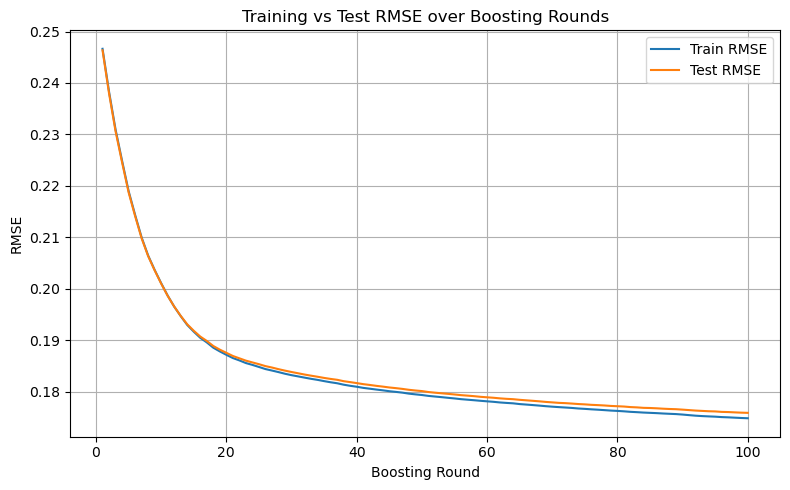

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Number of boosting rounds
n_estimators = 100

# Store RMSEs for one of the models (e.g., Risk_PN)
train_errors = []
test_errors = []

# Re-prepare the data
X = df[input_columns]
y = df['Risk_PN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess manually
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Train model stage by stage
model = XGBRegressor(n_estimators=n_estimators, learning_rate=0.1, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

for i in range(1, n_estimators + 1):
    y_train_pred = model.predict(X_train_transformed, iteration_range=(0, i))
    y_test_pred = model.predict(X_test_transformed, iteration_range=(0, i))
    
    # Compute RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_estimators + 1), train_errors, label='Train RMSE')
plt.plot(range(1, n_estimators + 1), test_errors, label='Test RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('Training vs Test RMSE over Boosting Rounds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
# Accuracy 

In [90]:
r2

0.7239662854803762

In [44]:
# Linear regression

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Input features (same for all models)
input_columns = ['name', 'state', 'Hour', 'Business_category', 'incidentType']

# Output columns (different for each model)
output_columns = ['Risk_PN', 'Risk_NP', 'Risk_PF', 'Risk_FP', 'Risk_FN', 'Risk_NF']

# Define categorical and numeric columns
categorical_cols = ['name', 'state', 'Business_category', 'incidentType']
numeric_cols = ['Hour']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ])

# Create dictionaries for models and predictions
models = {}
predictions = {}

# Train a separate model for each risk column
for risk_col in output_columns:
    # Prepare the data
    X = df[input_columns]
    y = df[risk_col]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Pipeline: preprocessing + model (using Linear Regression)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())  # Using Linear Regression instead of XGBRegressor
    ])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Save the trained model
    models[risk_col] = pipeline

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    predictions[risk_col] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    r2_linreg= r2_score(y_test,y_pred)
    print(f"Mean Squared Error for {risk_col}: {mse}")

# Optional: Access individual predictions
predictions_PN = predictions['Risk_PN']
predictions_NP = predictions['Risk_NP']
predictions_PF = predictions['Risk_PF']
predictions_FP = predictions['Risk_FP']
predictions_FN = predictions['Risk_FN']
predictions_NF = predictions['Risk_NF']


Mean Squared Error for Risk_PN: 0.030605027437695165
Mean Squared Error for Risk_NP: 0.03252834537617543
Mean Squared Error for Risk_PF: 0.0353820860070912
Mean Squared Error for Risk_FP: 0.031182293970308014
Mean Squared Error for Risk_FN: 0.030819265998579235
Mean Squared Error for Risk_NF: 0.04638260428146961


In [47]:
r2_linreg

0.5511246529138514

In [49]:
# random forest

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Input features (same for all models)
input_columns = ['name', 'state', 'Hour', 'Business_category', 'incidentType']

# Output columns (different for each model)
output_columns = ['Risk_PN', 'Risk_NP', 'Risk_PF', 'Risk_FP', 'Risk_FN', 'Risk_NF']

# Define categorical and numeric columns
categorical_cols = ['name', 'state', 'Business_category', 'incidentType']
numeric_cols = ['Hour']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ])

# Create dictionaries for models and predictions
models = {}
predictions = {}

# Train a separate model for each risk column
for risk_col in output_columns:
    # Prepare the data
    X = df[input_columns]
    y = df[risk_col]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define individual models
    model1 = XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42, n_jobs=-1)
    model2 = LinearRegression()
    model3 = RandomForestRegressor(n_estimators=25, random_state=42, n_jobs=-1)

    # Create an ensemble model using VotingRegressor
    ensemble_model = VotingRegressor(estimators=[
        ('xgb', model1),
        ('lr', model2),
        ('rf', model3)
    ])

    # Pipeline: preprocessing + ensemble model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', ensemble_model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Save the trained model
    models[risk_col] = pipeline

    # Make predictions
    y_pred = pipeline.predict(X_test)
    predictions[risk_col] = y_pred

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {risk_col}: {mse}")

# Optional: Access individual predictions
predictions_PN = predictions['Risk_PN']
predictions_NP = predictions['Risk_NP']
predictions_PF = predictions['Risk_PF']
predictions_FP = predictions['Risk_FP']
predictions_FN = predictions['Risk_FN']
predictions_NF = predictions['Risk_NF']


Mean Squared Error for Risk_PN: 0.02953700015829019
Mean Squared Error for Risk_NP: 0.0275519136310259
Mean Squared Error for Risk_PF: 0.03021940013609092
Mean Squared Error for Risk_FP: 0.027415066388811228
Mean Squared Error for Risk_FN: 0.02907535133702019
Mean Squared Error for Risk_NF: 0.02818896368546246


In [52]:
import pickle

# Save each trained model as a .pkl file
for risk_col, model in models.items():
    model_filename = f"{risk_col}_ensemble_model.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model for {risk_col} saved as {model_filename}")


Model for Risk_PN saved as Risk_PN_ensemble_model.pkl
Model for Risk_NP saved as Risk_NP_ensemble_model.pkl
Model for Risk_PF saved as Risk_PF_ensemble_model.pkl
Model for Risk_FP saved as Risk_FP_ensemble_model.pkl
Model for Risk_FN saved as Risk_FN_ensemble_model.pkl
Model for Risk_NF saved as Risk_NF_ensemble_model.pkl


In [53]:
df

,Unnamed: 0,Year,incidentType,Business_category,Firms,Establishments,Hour,Risk_PN,Risk_NF,Risk_PF,Risk_NP,Risk_FN,Risk_FP,FIPS,name,state
0,0,2021,Fire,Airports & Air Transport,22,22,0,0.344000,0.245623,0.832339,0.804678,0.182578,0.591628,08013,Boulder County,Colorado
1,1,2021,Fire,Airports & Air Transport,22,22,12,0.426318,0.245623,0.798812,0.561823,0.328392,0.591628,08013,Boulder County,Colorado
2,2,2021,Fire,Airports & Air Transport,22,22,24,0.496853,0.245623,0.757769,0.561823,0.445531,0.591628,08013,Boulder County,Colorado
3,3,2021,Fire,Airports & Air Transport,22,22,36,0.557518,0.245623,0.707290,0.561823,0.540159,0.591628,08013,Boulder County,Colorado
4,4,2021,Fire,Airports & Air Transport,22,22,48,0.609881,0.245623,0.644901,0.561823,0.617009,0.591628,08013,Boulder County,Colorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191787,191787,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,60,0.151276,0.355313,0.117263,0.112123,0.158769,0.119407,45077,Pickens County,South Carolina
191788,191788,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,72,0.168229,0.329571,0.089463,0.112123,0.182358,0.119407,45077,Pickens County,South Carolina
191789,191789,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,84,0.184787,0.302698,0.060678,0.112123,0.205203,0.119407,45077,Pickens County,South Carolina
191790,191790,2016,Fire,Power Plants (Electricity Generation & Distrib...,3,3,96,0.200960,0.274639,0.030871,0.112123,0.227329,0.119407,45077,Pickens County,South Carolina


In [54]:
df.to_csv("changed_data.csv")
